In [1]:
import jaxley as jx
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

cell = jx.read_swc("morphology/ball-and-stick.swc", ncomp=1, assign_groups=True)
# branch = jx.Branch()

In [2]:
cell.nodes[cell.nodes['local_branch_index'] == 5]

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param,soma,basal,apical,custom
5,0,5,0,300.0,1.5,5000.0,1.0,-70.0,0,5,5,0,False,False,True,False


In [ ]:
cell[5].xyzr

In [3]:
cell[5].xyzr

[array([[  0.,   0.,   0.,  10.],
        [  0.,  10.,   0.,   2.],
        [  0., 100.,   0.,   2.],
        [  0., 200.,   0.,   1.],
        [  0., 300.,   0.,   1.]])]

In [6]:
cell._radius_generating_fns

[functools.partial(<function _padded_radius at 0x7a14dc68d260>, radiuses=10.0),
 functools.partial(<function _radius at 0x7a14dc68d300>, cutoffs=array([-1.00000000e-08,  1.00000001e+00]), radiuses=array([10., 10.])),
 functools.partial(<function _radius at 0x7a14dc68d300>, cutoffs=array([-1.00000000e-08,  1.00000001e+00]), radiuses=array([10., 10.])),
 functools.partial(<function _radius at 0x7a14dc68d300>, cutoffs=array([-1.00000000e-08,  1.00000000e-01,  1.00000001e+00]), radiuses=array([10.,  2.,  2.])),
 functools.partial(<function _radius at 0x7a14dc68d300>, cutoffs=array([-1.00000000e-08,  1.00000000e-01,  1.00000001e+00]), radiuses=array([10.,  2.,  2.])),
 functools.partial(<function _radius at 0x7a14dc68d300>, cutoffs=array([-1.00000000e-08,  3.33333333e-02,  3.33333333e-01,  6.66666667e-01,
         1.00000001e+00]), radiuses=array([10.,  2.,  2.,  1.,  1.])),
 functools.partial(<function _radius at 0x7a14dc68d300>, cutoffs=array([-1.00000000e-08,  1.00000001e+00]), radiuses=

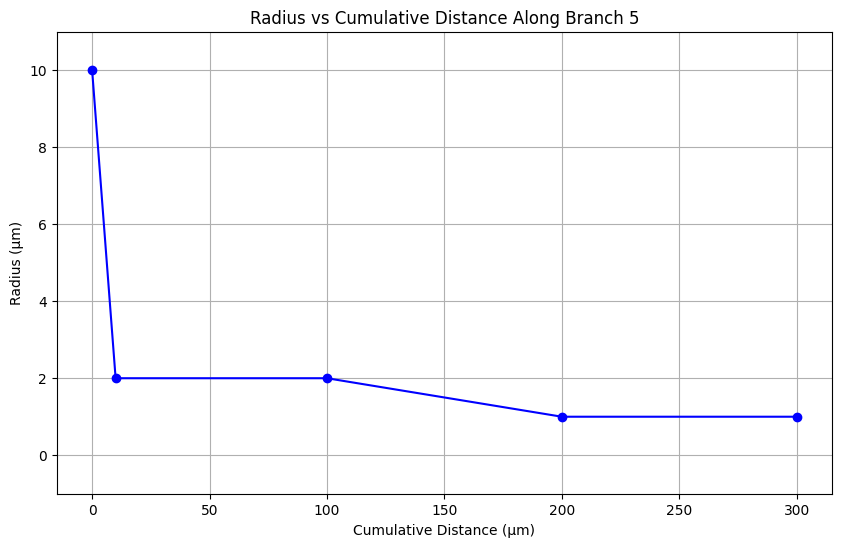

In [4]:
# Get xyzr data for branch 5
xyzr_data = cell[5].xyzr

# Calculate Euclidean distances between consecutive points
# Extract x, y, z coordinates and radii
# xyzr_data is a list containing an array, so we need to access the first element
xyzr_array = xyzr_data[0]
x, y, z = xyzr_array[:, 0], xyzr_array[:, 1], xyzr_array[:, 2]
radii = xyzr_array[:, 3]

# Calculate distances between consecutive points
distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)

# Add zero as the starting point and calculate cumulative distances
cum_distances = np.concatenate(([0], np.cumsum(distances)))

# Create a new plot for this specific visualization
fig_new, ax_new = plt.subplots(figsize=(10, 6))
ax_new.plot(cum_distances, radii, 'o-', color='blue')
ax_new.set_ylim(-1, 11)
ax_new.set_xlabel('Cumulative Distance (μm)')
ax_new.set_ylabel('Radius (μm)')
ax_new.set_title('Radius vs Cumulative Distance Along Branch 5')
ax_new.grid(True)

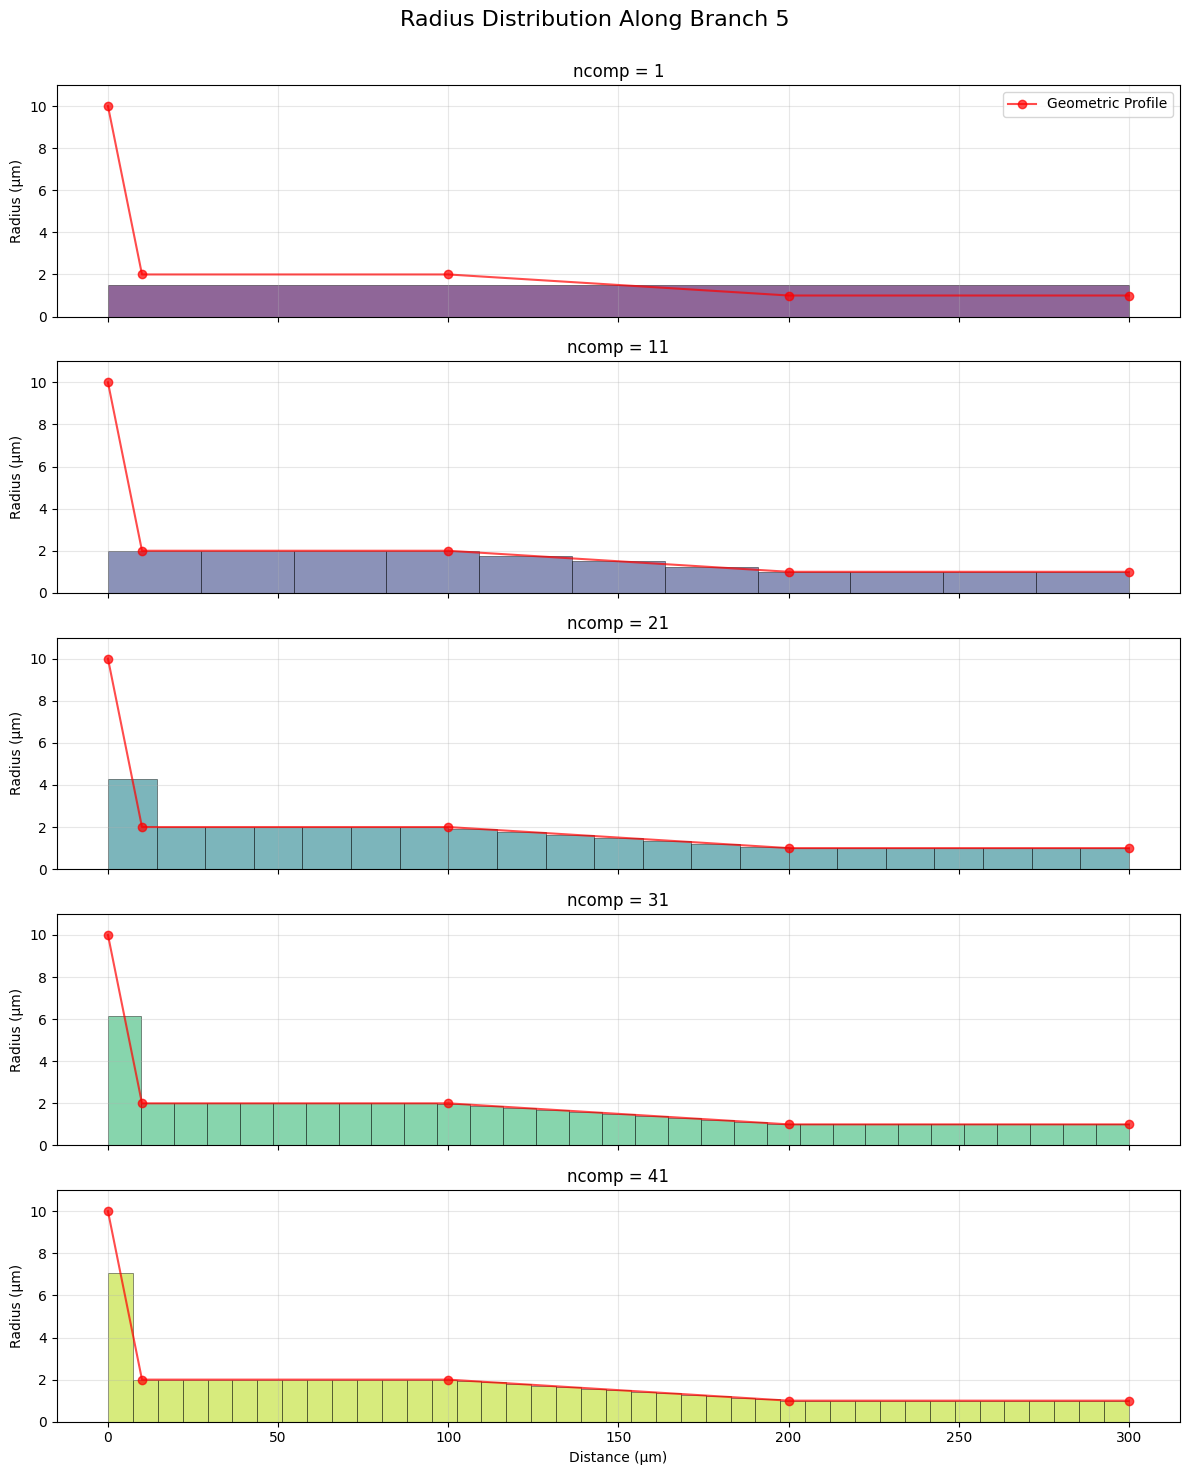

In [5]:
fig, axes = plt.subplots(5, 1, figsize=(12, 15), sharex=True)
fig.suptitle('Radius Distribution Along Branch 5', fontsize=16)

# Define a colormap to cycle through different colors
colors = plt.cm.viridis(np.linspace(0, 0.9, 5))

# Get xyzr data for branch 5
xyzr_data = cell[5].xyzr
xyzr_array = xyzr_data[0]
x, y, z = xyzr_array[:, 0], xyzr_array[:, 1], xyzr_array[:, 2]
radii = xyzr_array[:, 3]
distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)
cum_distances = np.concatenate(([0], np.cumsum(distances)))

# Plot the different ncomp variations with geometry overlay
for idx, i in enumerate(range(1, 50, 10)):
    ax = axes[idx]
    cell[5].set_ncomp(i)
    rs = cell.nodes[cell.nodes['local_branch_index'] == 5]['radius']
    ls = cell.nodes[cell.nodes['local_branch_index'] == 5]['length']
    cumsum_ls = ls.cumsum()
    
    color = colors[idx]
    
    # Create bar plot where width represents segment length and height represents radius
    # Add edgecolor='black' to show bar edges
    for j in range(len(rs)):
        left = cumsum_ls.iloc[j] - ls.iloc[j]  # Left edge of the bar
        width = ls.iloc[j]                    # Width of the bar
        height = rs.iloc[j]                   # Height of the bar
        ax.bar(left + width/2, height, width=width, alpha=0.6, color=color, 
               edgecolor='black', linewidth=0.5)
    
    # Overlay the geometric plot on each subplot
    ax.plot(cum_distances, radii, 'o-', color='red', alpha=0.7, linewidth=1.5, 
           label='Geometric Profile')
    
    ax.set_ylabel('Radius (μm)')
    ax.set_title(f'ncomp = {i}')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 11)  # Consistent y-axis scale
    
    # Add legend to first subplot only
    if idx == 0:
        ax.legend(loc='upper right')

axes[-1].set_xlabel('Distance (μm)')
plt.tight_layout()
plt.subplots_adjust(top=0.93)

# ...

In [3]:
branch.set('length', 20)
branch.set('radius', 10)
branch.set('axial_resistivity', 100)

In [4]:
branch.at(0.5)

TypeError: 'NoneType' object is not callable

In [3]:
branch.nodes

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param
0,0,0,0,20.0,10.0,100.0,1.0,-70.0,0,0,0,0


In [4]:
duration = 1000
dt = 0.025

In [6]:
current = jx.step_current(i_delay=100, i_dur=800, i_amp=0.1, delta_t=dt, t_max=duration)
branch.loc(0.5).stimulate(current)

Added 1 external_states. See `.externals` for details.


In [7]:
branch.loc(0.5).record('v')

Added 1 recordings. See `.recordings` for details.


In [9]:
vs = jnp.squeeze(
            jx.integrate(
                module=branch, 
                params=[],
                param_state=None,
                voltage_solver='jax.sparse',
                delta_t=dt,
                t_max=duration
            ).block_until_ready()
        )
t = np.arange(0, duration + 2*dt, dt)[:-1]

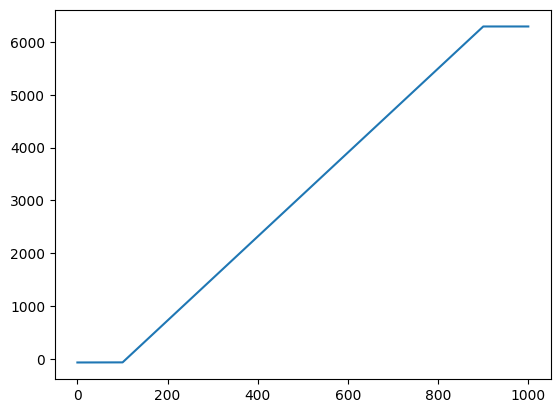

In [10]:
import matplotlib.pyplot as plt
plt.plot(t, vs)